### Load necessary libraries. Import and load the dataset

In [34]:
from pathlib import Path
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [35]:
project_root = Path.cwd().parent
csv_path = project_root / "data" / "raw" / "E-Commerce_Flipkart.csv"

In [36]:
print("Looking for file at: ", csv_path)

Looking for file at:  c:\Users\aravi\OneDrive\Desktop\Github\E‑Commerce‑Revenue‑Management\data\raw\E-Commerce_Flipkart.csv


In [37]:
ECom_Data = pd.read_csv(csv_path)

In [38]:
ECom_Data.head()

,Customer_uniq_id,Region,Order_Date,Expected_Delivery_Date,Delivered_Date,product_name,product_main_category,product_subcategory,product_category_filter,product_category_subfilter,product_unique ID,retail_price,discounted_price,product_rating,Brand,product_specifications,description
0,c2d766ca982eca8304150849735ffef9,North,31-12-2021,03-01-2022,02-01-2022,Alisha Solid Women's Cycling Shorts,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,SRTEH2FF9KEDEFGF,999,379,2.0,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Key Features of Alisha Solid Women's Cycling S...
1,7f7036a6d550aaa89d34c77bd39a5e48,East,31-12-2021,03-01-2022,02-01-2022,FabHomeDecor Fabric Double Sofa Bed,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish C...,SBEEH3QGU7MFYJFY,32157,22646,2.0,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,f449ec65dcbc041b6ae5e6a32717d01b,East,31-12-2021,03-01-2022,02-01-2022,AW Bellies,Footwear,Women's Footwear,Ballerinas,AW Bellies,SHOEH4GRSUBJGZXE,999,499,1.0,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",Key Features of AW Bellies Sandals Wedges Heel...
3,0973b37acd0c664e3de26e97e5571454,West,31-12-2021,03-01-2022,02-01-2022,Alisha Solid Women's Cycling Shorts,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,SRTEH2F6HUZMQ6SJ,699,267,5.0,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Key Features of Alisha Solid Women's Cycling S...
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,West,31-12-2021,03-01-2022,02-01-2022,Sicons All Purpose Arnica Dog Shampoo,Pet Supplies,Grooming,Skin & Coat Care,Shampoo,PSOEH3ZYDMSYARJ5,220,210,5.0,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",Specifications of Sicons All Purpose Arnica Do...


In [39]:
ECom_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8927 entries, 0 to 8926
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_uniq_id            8927 non-null   object 
 1   Region                      8927 non-null   object 
 2   Order_Date                  8927 non-null   object 
 3   Expected_Delivery_Date      8927 non-null   object 
 4   Delivered_Date              8927 non-null   object 
 5   product_name                8927 non-null   object 
 6   product_main_category       8927 non-null   object 
 7   product_subcategory         8927 non-null   object 
 8   product_category_filter     8927 non-null   object 
 9   product_category_subfilter  8927 non-null   object 
 10  product_unique ID           8927 non-null   object 
 11  retail_price                8927 non-null   int64  
 12  discounted_price            8927 non-null   int64  
 13  product_rating              8927 

### Data Cleaning and Pre-processing

In [40]:
# Dropping columns that don't add value to the analysis
ECom_Data.drop(columns=["product_specifications", "description"], axis=1, inplace=True)

In [41]:
# Check for missing values
ECom_Data.isnull().sum()

Customer_uniq_id              0
Region                        0
Order_Date                    0
Expected_Delivery_Date        0
Delivered_Date                0
product_name                  0
product_main_category         0
product_subcategory           0
product_category_filter       0
product_category_subfilter    0
product_unique ID             0
retail_price                  0
discounted_price              0
product_rating                0
Brand                         0
dtype: int64

In [42]:
# Check for duplicates in customer id
ECom_Data["Customer_uniq_id"].unique().shape[0]

8927

In [43]:
# Change date columns to datetime formnat
date_columns = ["Order_Date", "Expected_Delivery_Date", "Delivered_Date"]
for col in date_columns:
    ECom_Data[col] = pd.to_datetime(ECom_Data[col], format='%d-%m-%Y')

In [44]:
# Create new column to track delivery delays
ECom_Data["Delivery_Delay"] = (ECom_Data.Delivered_Date - ECom_Data.Expected_Delivery_Date)
ECom_Data["Delivery_Delay"] = ECom_Data["Delivery_Delay"].dt.days


In [45]:
# Check delivery delays
ECom_Data["Delivery_Delay"].value_counts().reindex([-3, -2, -1, 0, 1])

Delivery_Delay
-3       7
-2     162
-1     120
 0    8609
 1      29
Name: count, dtype: int64

In [46]:
# Create a new column to categorize delviery delays
ECom_Data["Delivery_Tracker"] = np.where(ECom_Data["Delivery_Delay"] < 0, "Early", np.where(ECom_Data["Delivery_Delay"] == 0, "On Time", "Late"))
ECom_Data.drop(columns=["Delivery_Delay"], inplace=True)

In [47]:
ECom_Data

,Customer_uniq_id,Region,Order_Date,Expected_Delivery_Date,Delivered_Date,product_name,product_main_category,product_subcategory,product_category_filter,product_category_subfilter,product_unique ID,retail_price,discounted_price,product_rating,Brand,Delivery_Tracker
0,c2d766ca982eca8304150849735ffef9,North,2021-12-31,2022-01-03,2022-01-02,Alisha Solid Women's Cycling Shorts,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,SRTEH2FF9KEDEFGF,999,379,2.0,Alisha,Early
1,7f7036a6d550aaa89d34c77bd39a5e48,East,2021-12-31,2022-01-03,2022-01-02,FabHomeDecor Fabric Double Sofa Bed,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish C...,SBEEH3QGU7MFYJFY,32157,22646,2.0,FabHomeDecor,Early
2,f449ec65dcbc041b6ae5e6a32717d01b,East,2021-12-31,2022-01-03,2022-01-02,AW Bellies,Footwear,Women's Footwear,Ballerinas,AW Bellies,SHOEH4GRSUBJGZXE,999,499,1.0,AW,Early
3,0973b37acd0c664e3de26e97e5571454,West,2021-12-31,2022-01-03,2022-01-02,Alisha Solid Women's Cycling Shorts,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,SRTEH2F6HUZMQ6SJ,699,267,5.0,Alisha,Early
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,West,2021-12-31,2022-01-03,2022-01-02,Sicons All Purpose Arnica Dog Shampoo,Pet Supplies,Grooming,Skin & Coat Care,Shampoo,PSOEH3ZYDMSYARJ5,220,210,5.0,Sicons,Early
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8922,90d30478255e23621e8929ed15c2f6e4,South,2020-12-01,2020-12-04,2020-12-04,Sinina Chanderi Embroidered Salwar Suit Dupatt...,Clothing,Women's Clothing,Ethnic Wear,Fabric,FABEGGHHDFMY8BZU,2980,1490,3.0,Sinina,On Time
8923,20a73e3f41490a73ceeba5f17658db8f,West,2020-12-01,2020-12-04,2020-12-04,Aarushi Fashion Chanderi Embroidered Salwar Su...,Clothing,Women's Clothing,Ethnic Wear,Fabric,FABEG8GFDUWRSNU3,2600,1300,1.0,Aarushi Fashion,On Time
8924,5c1554cd45f9d538c2c6947dbdd59c75,East,2020-12-01,2020-12-04,2020-12-04,"Ambika Lahenga Embroidered Lehenga, Choli and ...",Clothing,Women's Clothing,Ethnic Wear,Lehenga Cholis,LEHEGGEHYN4G2RPW,39992,24995,1.0,Ambika Lahenga,On Time
8925,6b737a4deca1ed0e56c179e66036e994,West,2020-12-01,2020-12-04,2020-12-04,Sinina Chanderi Embroidered Salwar Suit Dupatt...,Clothing,Women's Clothing,Ethnic Wear,Fabric,FABEGGHHGSVCHGFV,2000,1000,3.0,Sinina,On Time


In [48]:
ECom_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8927 entries, 0 to 8926
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Customer_uniq_id            8927 non-null   object        
 1   Region                      8927 non-null   object        
 2   Order_Date                  8927 non-null   datetime64[ns]
 3   Expected_Delivery_Date      8927 non-null   datetime64[ns]
 4   Delivered_Date              8927 non-null   datetime64[ns]
 5   product_name                8927 non-null   object        
 6   product_main_category       8927 non-null   object        
 7   product_subcategory         8927 non-null   object        
 8   product_category_filter     8927 non-null   object        
 9   product_category_subfilter  8927 non-null   object        
 10  product_unique ID           8927 non-null   object        
 11  retail_price                8927 non-null   int64       

### Univariate Analysis

In [14]:
ECom_Data.describe()

,Order_Date,Expected_Delivery_Date,Delivered_Date,retail_price,discounted_price,product_rating,Delivery_Delay
count,8927,8927,8927,8927.000000,8927.000000,8927.000000,8927.000000
mean,2021-02-02 15:00:06.049064704,2021-02-05 14:45:44.662260736,2021-02-05 13:35:24.834770944,1982.017587,1102.417946,3.066327,-0.048841
min,2020-12-01 00:00:00,2020-12-04 00:00:00,2020-12-02 00:00:00,115.000000,109.000000,1.000000,-3.000000
25%,2020-12-20 00:00:00,2020-12-25 00:00:00,2020-12-25 00:00:00,730.000000,350.000000,2.000000,0.000000
50%,2021-01-07 00:00:00,2021-01-10 00:00:00,2021-01-10 00:00:00,1195.000000,599.000000,3.000000,0.000000
75%,2021-03-12 00:00:00,2021-03-15 00:00:00,2021-03-15 00:00:00,2199.000000,1199.000000,4.000000,0.000000
max,2021-12-31 00:00:00,2022-01-03 00:00:00,2022-01-02 00:00:00,116292.000000,116292.000000,5.000000,1.000000
std,NaN,NaN,NaN,3398.280389,2473.479725,1.413840,0.306532


In [15]:
# Number of unique values in brand
ECom_Data["Brand"].value_counts()

Brand
Allure Auto      469
Regular          299
Slim             267
TheLostPuppy     229
Black            147
                ... 
Pick Pocket        1
Angelfish          1
Nuride             1
OM SHIVAKRITI      1
Vermello           1
Name: count, Length: 2580, dtype: int64

There are 2580 unique brands listed.

In [16]:
# Average product ratings per brand
ECom_Data.groupby(["Brand"])["product_rating"].mean().head(10)

Brand
1OAK           1.500000
3A AUTOCARE    3.268293
3D Mat         3.000000
3kFactory      2.000000
4D             3.600000
4D Mats        4.333333
5 FEELINGS     4.000000
69th Avenue    2.000000
720 Armour     2.500000
99Gems         2.500000
Name: product_rating, dtype: float64

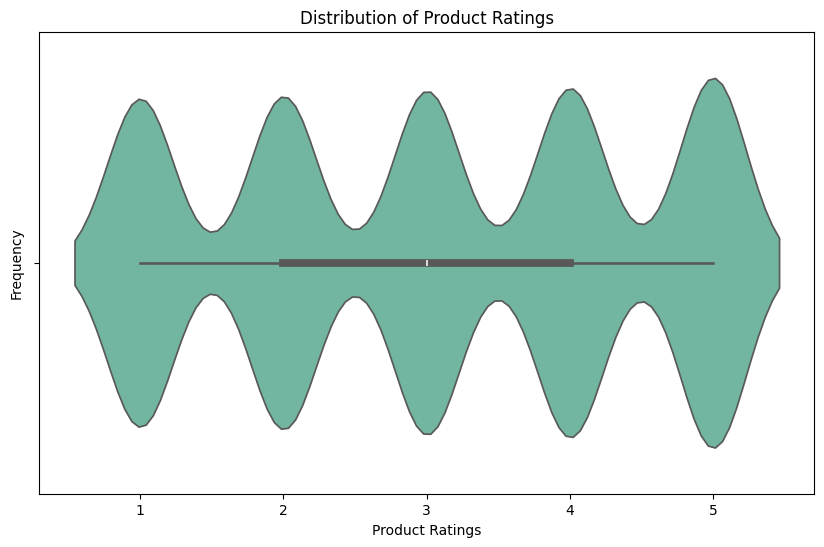

In [ ]:
# Distribution og product ratings
plt.figure(figsize = (10, 6))
sns.violinplot(x=ECom_Data["product_rating"], palette="Set2")
plt.title("Distribution of Product Ratings")
plt.xlabel("Product Ratings")
plt.show()

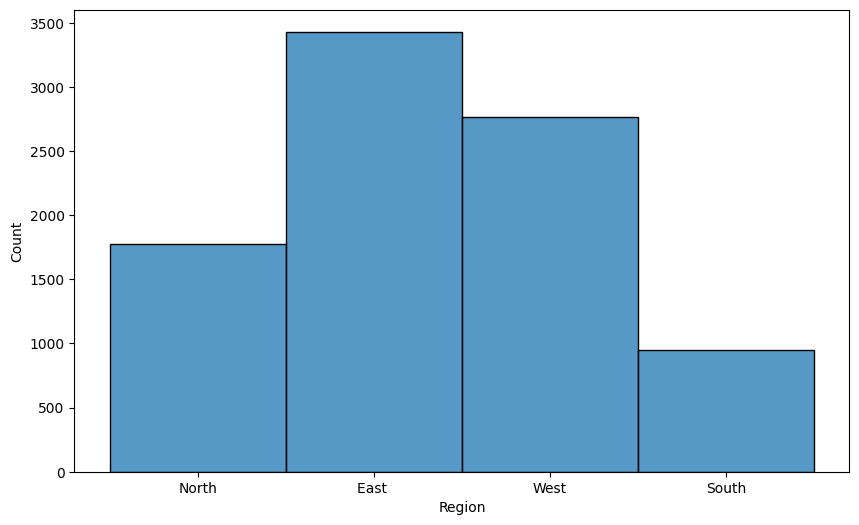

In [17]:
# Histogram of region wise sales
plt.figure(figsize=(10,6))
sns.histplot(ECom_Data["Region"], bins = 4)
plt.show()

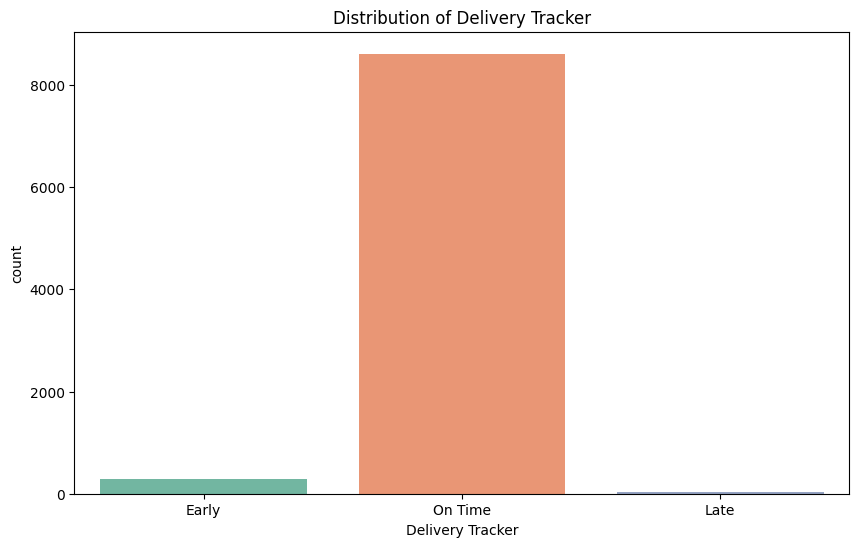

In [50]:
# Distribution of Delivery Tracker
plt.figure(figsize=(10,6))
sns.countplot(x=ECom_Data["Delivery_Tracker"], palette="Set2")
plt.title("Distribution of Delivery Tracker")
plt.xlabel("Delivery Tracker")
plt.show()

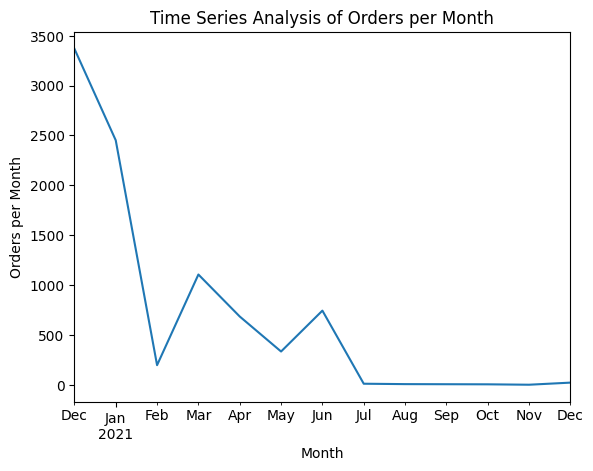

In [78]:
# Tme series analysis of orders per month
ECom_Data.set_index('Order_Date').resample('M').size().plot()
plt.title('Time Series Analysis of Orders per Month')
plt.xlabel('Month')
plt.ylabel('Orders per Month') 
plt.show()

### Bivariate Analysis

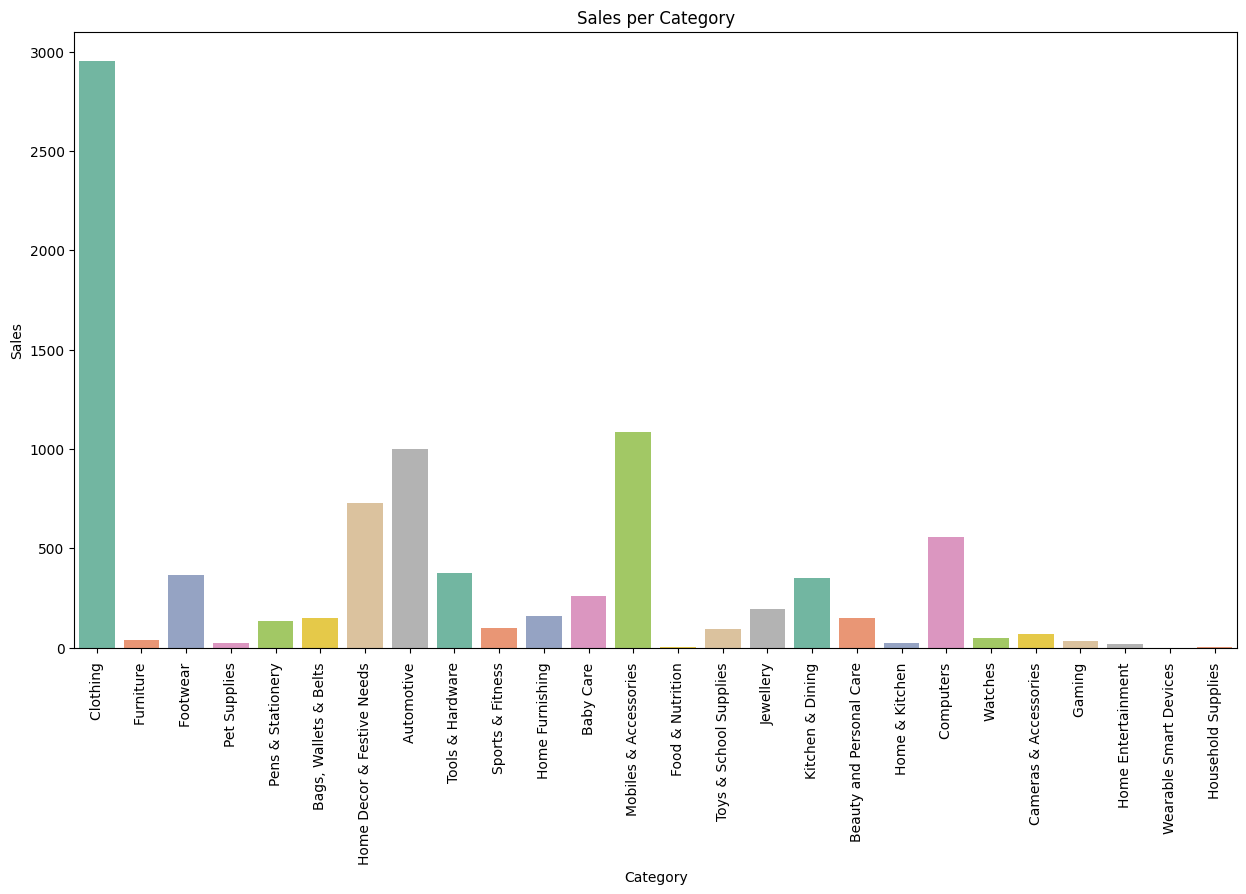

In [18]:
# Sales per category
plt.figure(figsize=(15, 8))
plt.title("Sales per Category")
sns.countplot(data=ECom_Data, x="product_main_category", palette="Set2")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.show()

In [19]:
ECom_Data['product_main_category'].value_counts().sort_values(ascending=True).head(1)

product_main_category
Wearable Smart Devices     1
Name: count, dtype: int64

We see that the maximum sales happened in the Clothing category while the minimum sales were noticed in Wearable Smart Devices.

The top five selling categories would be in the following order
1. Clothing
2. Mobiles & Accessories
3. Automotive
4. Home Decor & Festibe Needs
5. Computers

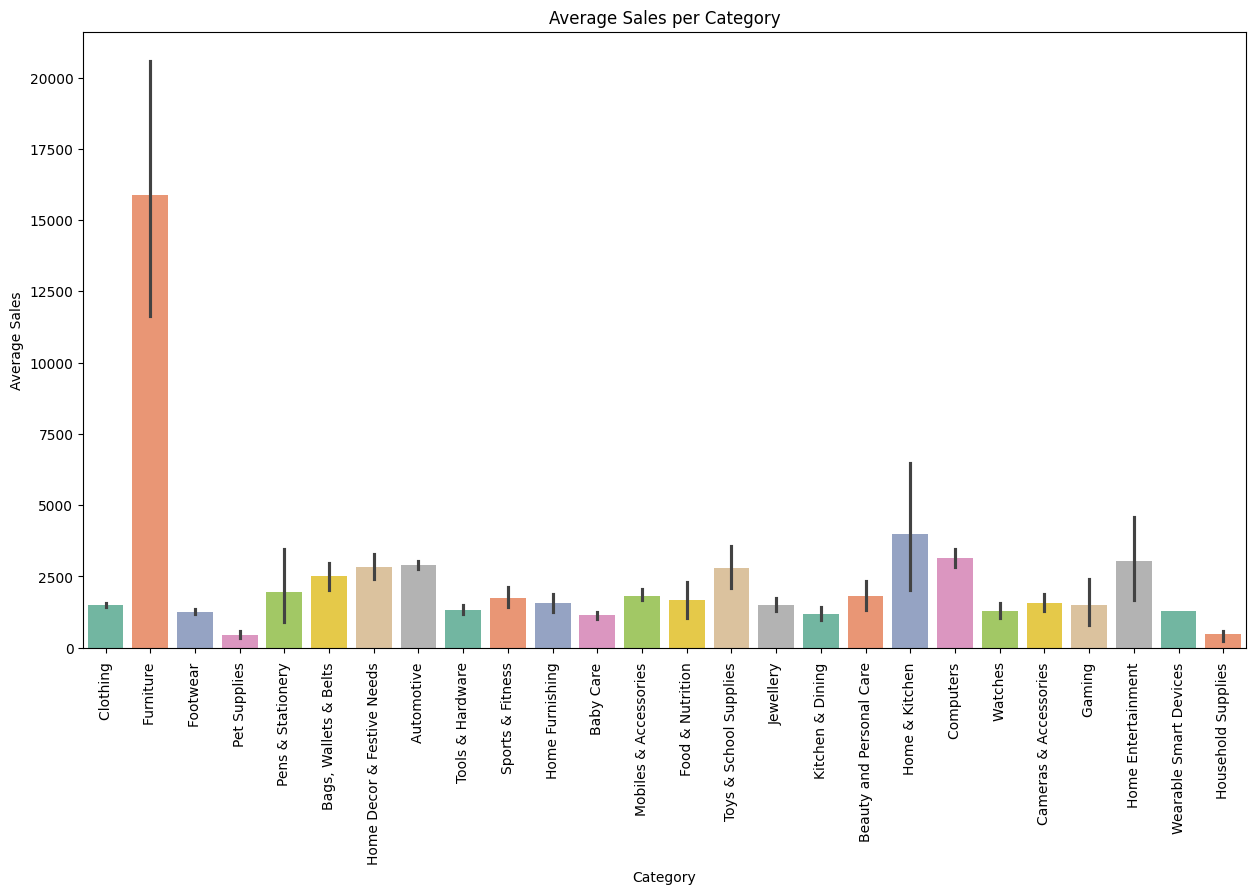

In [20]:
# Average sales per category
plt.figure(figsize=(15, 8))
sns.barplot(data=ECom_Data, x="product_main_category", y="retail_price", palette="Set2")
plt.title("Average Sales per Category")
plt.xlabel("Category")
plt.ylabel("Average Sales")
plt.xticks(rotation=90)
plt.show()